In [ ]:
import kagglehub
import shutil
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download latest version
path = kagglehub.dataset_download("jaidenroman/team-4-rps")

print("Path to dataset files:", path)

100%|██████████| 169M/169M [00:01<00:00, 173MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jaidenroman/team-4-rps/versions/1


In [ ]:
# Define local save path
local_path = "./RPS_DS/"

# Ensure the local directory exists
os.makedirs(local_path, exist_ok=True)
# Copy the dataset to the local directory
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(local_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

print(f"Dataset saved at: {local_path}")


FileExistsError: [Errno 17] File exists: './RPS_DS/RPS_DS_2'

In [ ]:
# Correcting paths
train_dir = "/content/RPS_DS/RPS_DS_3/TRAIN"
test_dir = "/content/RPS_DS/RPS_DS_3/TEST"

IMG_SZ = (300, 200)
BATCH_SZ = 32

# Define ImageDataGenerator for augmentation and rescaling
gen_train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

gen_test_data = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_data = gen_train_data.flow_from_directory(
    train_dir,
    target_size=(IMG_SZ[0], IMG_SZ[1]),
    batch_size=BATCH_SZ,
    class_mode='categorical'
)

# Load testing dataset
test_data = gen_test_data.flow_from_directory(
    test_dir,
    target_size=(IMG_SZ[0], IMG_SZ[1]),
    batch_size=BATCH_SZ,
    class_mode='categorical'
)

Found 1704 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
#Automatically creates list of class names rather than defining manually
class_map = train_data.class_indices
class_names = list(class_map.keys())

In [ ]:
#Path where the trained model will be saved or loaded from.
model_path = "rockpaperscissors_model.h5"

#Keegan: Removed the original class_names list

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SZ[0], IMG_SZ[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    epochs=6,
    validation_data=test_data
)

Epoch 1/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.3642 - loss: 1.3131 - val_accuracy: 0.3833 - val_loss: 1.1307
Epoch 2/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 509ms/step - accuracy: 0.4391 - loss: 1.0592 - val_accuracy: 0.3875 - val_loss: 1.0158
Epoch 3/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 520ms/step - accuracy: 0.5454 - loss: 0.8882 - val_accuracy: 0.6000 - val_loss: 0.8170
Epoch 4/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 524ms/step - accuracy: 0.6182 - loss: 0.7654 - val_accuracy: 0.6000 - val_loss: 0.7616
Epoch 5/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 509ms/step - accuracy: 0.6365 - loss: 0.7119 - val_accuracy: 0.6833 - val_loss: 0.6540
Epoch 6/6
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.6879 - loss: 0.6598 - val_accuracy: 0.7000 - val_loss: 0.6274


In [ ]:
test_loss, test_acc = model.evaluate(train_data)
print(f"Test Accuracy: {test_acc:.2f}")
model.save(model_path)

54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 497ms/step - accuracy: 0.6937 - loss: 0.6201


Test Accuracy: 0.70


In [ ]:
# === Predict from new image ===
def predict_new_image(img_path):
    model = load_model(model_path)

    img = Image.open(img_path).convert("RGB")
    img = img.resize(IMG_SZ)

    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape(1, IMG_SZ[1], IMG_SZ[0], 3)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    confidence = prediction[0][predicted_index]

    # Display
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_names[predicted_index]} ({confidence:.2%})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


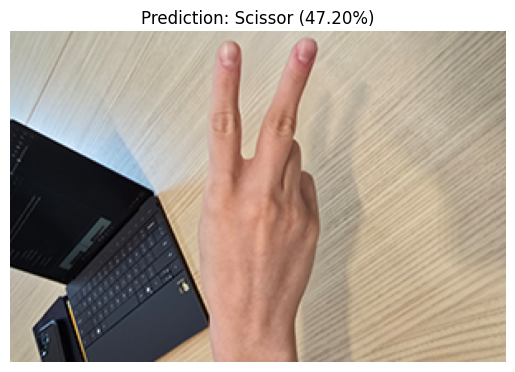

In [ ]:
predict_new_image("/content/RPS_DS/RPS_DS_2/TEST/Scissor/20250609_112125.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


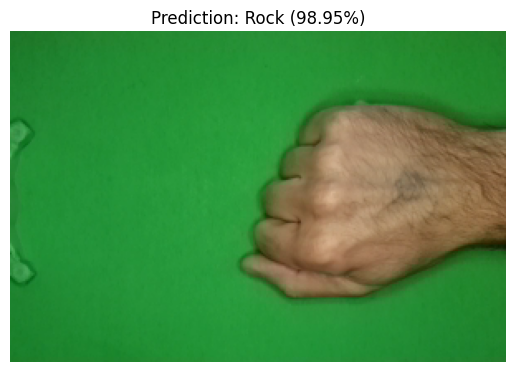

In [ ]:
predict_new_image("/content/RPS_DS/RPS_DS_2/TEST/Rock/Z1iNm9ej2ER2TGtC.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


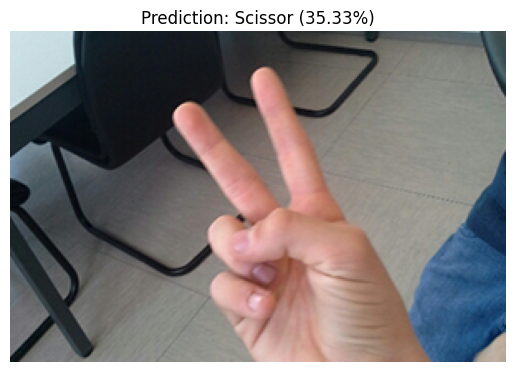

In [ ]:
predict_new_image("/content/RPS_DS/RPS_DS_2/TEST/Scissor/scissor_355.png")